In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/

In [7]:
a = [1,3,2]
a.remove(2)
a

[1, 3]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
# import imageio
import xarray as xr
from netCDF4 import Dataset
# import pickle
# import math
# from PIL import Image
# from tqdm.auto import tqdm
# import random
# from IPython.display import Image #, display
# import json
# from sklearn.metrics import mean_squared_error
# from skimage.transform import resize
# import json
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from keras.callbacks import LambdaCallback

# from sklearn.decomposition import PCA as pca
# import io
# from ipywidgets import widgets, Layout, HBox
# from scipy import stats
# from pysteps import verification
# from skimage.metrics import structural_similarity as ssim
# from skimage.metrics import mean_squared_error
# from skimage.transform import resize
# import statistics

# from numpy.random.mtrand import randint
# from math import log10, sqrt
# import cv2
 


# train = np.load('/content/drive/MyDrive/train-4.npy')
# testaf_6 = np.load('/content/drive/MyDrive/test-6.npy')
# val = np.load('/content/drive/MyDrive/val-4.npy')
# test_6 = np.load('/content/drive/MyDrive/test-6 (1).npy')

In [39]:
train.shape

(88, 6, 128, 128, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

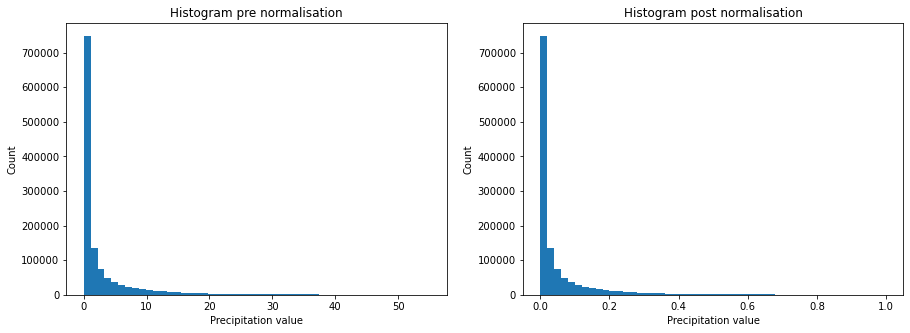

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Histogram pre normalisation')
plt.xlabel('Precipitation value')
plt.ylabel('Count')
plt.hist(((train[train!=0])*55).flatten(), bins = 50)



plt.subplot(1, 2, 2)
plt.title('Histogram post normalisation')
plt.xlabel('Precipitation value')
plt.ylabel('Count')
plt.hist(train[train!=0].flatten(), bins = 50)

plt.show


In [2]:
# Global variables

nc_dir = '/Users/itish/Documents/Diss/Files/data/'
# nc_online_dir = r'\\envdfs.leeds.ac.uk\a321\datasets\ERA-interim'

# data_dir = 'C:/Users/marcv/OneDrive/Documentos/Python Scripts/Dissertation/Data_float32/'
# data_filtered = '/Users/itish/Documents/Diss/Files/cleanData/'

# img_dir = '/Users/itish/Documents/Diss/Files/outputs/rawIms'
# var_dir = 'C:/Users/marcv/OneDrive/Documentos/Python Scripts/Dissertation/variables/'
# model_dir = 'C:/Users/marcv/OneDrive/Documentos/Python Scripts/Dissertation/models/'

# mm_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [3]:
arr1 = os.listdir(nc_dir)
arr1 = sorted(arr1)
arr1=arr1[1:]
len(arr1)

1200

In [ ]:
#timeseries plot
import xarray as xr

# fname = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_onedeg/Best'  # Remote OPeNDAP Dataset 
fname = '/Users/itish/Documents/Diss/Files/data/200306020030-200306022330.nc'   # Local NetCDF file

ds = xr.open_dataset(fname)
dsloc = ds.sel(longitude=370.5,latitude=-45.0,method='nearest')
ds.close()
dsloc['a04203'].plot();

In [6]:
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

/var/folders/z9/3z2hn7yx20d993zq6c4s0d340000gn/T/ipykernel_1532/1780048981.py:34: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  cs = m.pcolor(xi,yi,np.squeeze(tmax),cmap = 'Accent_r')


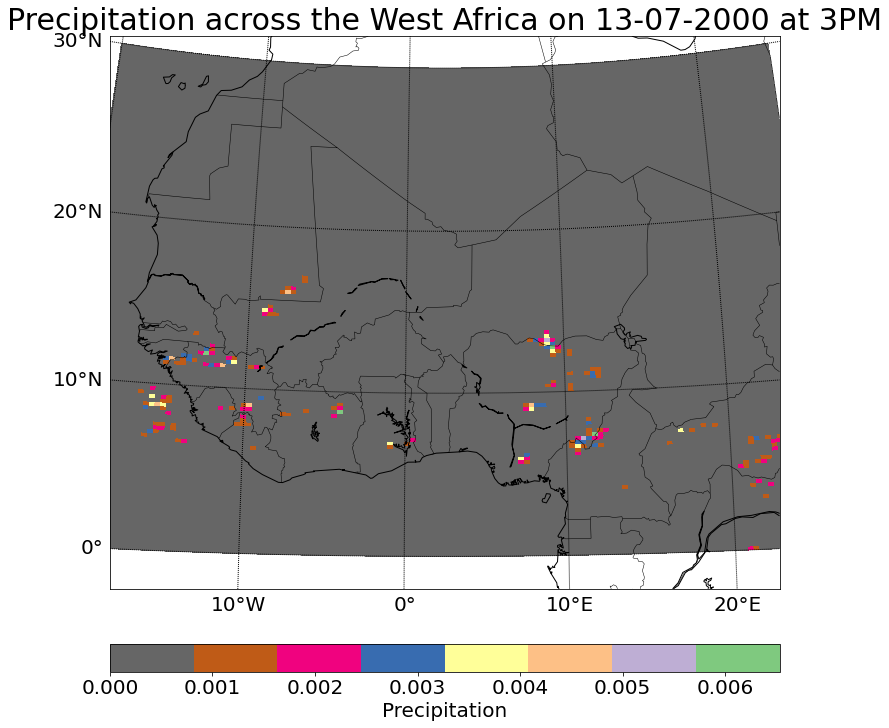

In [12]:
with xr.open_dataset('/Users/itish/Downloads/a04203_A1hr_mean_ah261_25-4km_200007130030-200007132330.nc', mode='r', decode_cf=True) as ds2:
            # ds2 = ds2.variables['a04203']
            # ds2 = ds2[1,:,:]
            dsm2 = ds2.where((385> ds2.longitude) 
            &(340 < ds2.longitude) 
            & (0 < ds2.latitude) 
            & (ds2.latitude < 30), drop=True)


lons = dsm2.variables['longitude'][:]
lats = dsm2.variables['latitude'][:]

tmax = dsm2.variables['a04203'][20,:,:]



# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=4600000,height=3800000,
    resolution='l',projection='stere',\
    lat_ts=50,lat_0=lat_0,lon_0=lon_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
# Plot Data

plt.figure(figsize=(12,12))

cs = m.pcolor(xi,yi,np.squeeze(tmax),cmap = 'Accent_r')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=20)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
plt.title('Precipitation across the West Africa on 13-07-2000 at 3PM', fontsize = 30)
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('Precipitation', fontsize = 20)
cbar.ax.tick_params(labelsize=20)



/var/folders/z9/3z2hn7yx20d993zq6c4s0d340000gn/T/ipykernel_1532/458981983.py:38: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  cs = m.pcolor(xi,yi,np.squeeze(tmax),cmap = 'Accent_r')


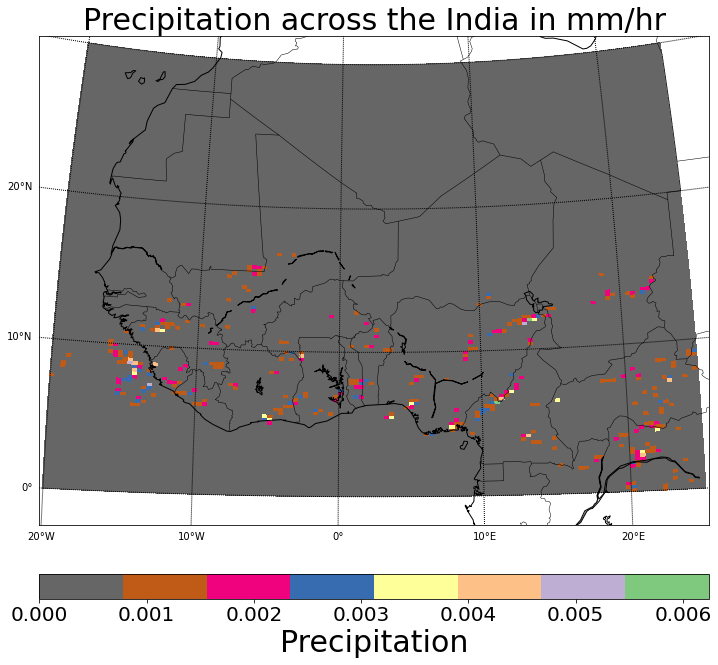

In [8]:
#Basemap
with xr.open_dataset('/Users/itish/Downloads/a04203_A1hr_mean_ah261_25-4km_200007130030-200007132330.nc', mode='r', decode_cf=True) as dsm2:
    dsm2 = dsm2.where((385> ds2.longitude) 
    &(340 < ds2.longitude) 
    & (0 < ds2.latitude) 
    & (ds2.latitude < 30), drop=True)
dsm2 = ds2.where((385> ds2.longitude) 
            &(340 < ds2.longitude) 
            & (0 < ds2.latitude) 
            & (ds2.latitude < 30), drop=True)

tmax = dsm2.variables['a04203'][15,:,:]
lons = dsm2.variables['longitude'][:]
lats = dsm2.variables['latitude'][:]

# cs = m.pcolor(xi,yi,np.squeeze(tmax*3600),cmap = 'Paired')



# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5200000,height=3800000,
    resolution='l',projection='stere',\
    lat_ts=50,lat_0=lat_0,lon_0=lon_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
# Plot Data

plt.figure(figsize=(12,12))

cs = m.pcolor(xi,yi,np.squeeze(tmax),cmap = 'Accent_r')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
plt.title('Precipitation across the India in mm/hr', fontsize = 30)
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('Precipitation', fontsize = 30)
cbar.ax.tick_params(labelsize=20)


# Add Title







In [7]:
# Functions
#function to plot charts
def plotChart(file) :
    f = open(file)
    x = json.load(f)
    train = [x[ob]['loss'] for ob in x]
    val = [x[ob]['val loss'] for ob in x]
    plt.figure(figsize=(20, 10))
    plt.plot(train, 'r', label = 'training loss', )
    plt.plot(val, 'g', label = 'val loss' )
    plt.legend(loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training and validation loss')
    plt.legend(loc='upper right')
    plt.show()
  
def errors(file) :
    with open(file, "rb") as fp:   # Unpickling
        err = pickle.load(fp)
    a = [i[0] for i in err]
    b = [i[1] for i in err]
    c = [i[2] for i in err]
    d = [i[3] for i in err]
    plt.figure(figsize=(20, 10))
    plt.plot(a, 'r', label = '1st frame', )
    plt.plot(b, 'g', label = '2nd frame' )
    plt.plot(c, 'y', label = '3rd frame' )
    plt.plot(d, 'b', label = '4th frame' )
    plt.legend(loc='lower right')
    plt.xlabel('file')
    plt.ylabel('error')
    plt.title('Errors')
    plt.legend(loc='upper right')
    plt.show()

def plotChartKL(file) :
    f = open(file)
    x = json.load(f)
    train = [x[ob]['kullback_leibler_divergence']*1000 for ob in x]
    val = [x[ob]['val_kullback_leibler_divergence']*1000 for ob in x]
    plt.figure(figsize=(20, 10))
    plt.plot(train, 'r',label = 'Training KL divergence' )
    plt.plot(val, 'g', label = 'Validation KL divergence' )


    plt.legend(loc='lower right')
    plt.xlabel('epoch', fontsize = 40)
    plt.ylabel('loss * 1000', fontsize = 40)
    plt.title('Training vs Validation KL divergence', fontsize = 40)
    plt.legend(loc='upper right', fontsize = 40)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)

    plt.show()
  
def saveImage(data, filename, negative = False):
    if negative: data = 1 - normalize(data)
    else: data = normalize(data)
    data = (data * 255).round().astype(np.uint8)
    imageio.imwrite('./' + filename +'.png', data)

    
def resize_numpy_Image(data, negative = False, new_size = (128, 128)):
    
    # Convert to Image and Resize
    if negative: data = 1 - normalize(data)
    else: data = normalize(data)
        
    data = (data * 255).round().astype(np.uint8)
    img = Image.fromarray(data , 'L').resize(new_size) 
    data = normalize(np.array(img), 0, 255)
    
    return data
    



In [ ]:
#timeseries plot

plt.figure(figsize=(12,12))
plt.title('Time series analysis',fontsize=30)
for s in range(4):

    ds = xr.open_dataset(nc_dir+arr1[61+s])
    dsloc = ds.sel(longitude=348.9248,latitude=13.7109375,method='nearest')
    ds.close()
    # dsloc['a04203'].plot()
    a=dsloc['a04203']*3600
    plt.plot(dsloc['a04203']*3600)
    
# ds

In [4]:
# precipitation vals
def getPrecVal(filedir, filename, latbounds, lonbounds, hour, min):

    # Open FILE
    fh = Dataset(filedir + filename)  
    lats = fh.variables['latitude'][:]
    lons = fh.variables['longitude'][:]
    
    # Latitude indexes (Low and Upper)
    lat_li = np.argmin( np.abs( lats - latbounds[0] ) )
    lat_ui = np.argmin( np.abs( lats - latbounds[1] ) ) 
    # Longitude indexes (Low and Upper)
    lon_li = np.argmin( np.abs( lons - lonbounds[0] ) )
    lon_ui = np.argmin( np.abs( lons - lonbounds[1] ) )  

    prec = fh.variables['a04203'][hour,lat_li:lat_ui ,lon_li:lon_ui ]
    
    lats = lats[lat_li:lat_ui] 
    lons = lats[lon_li:lon_ui] 
    
    fh.close()
    prec = prec*3600
    # prec processing    

    prec[prec < min] = 0
    prec = np.flip(prec.data, axis = 0)

    return prec #, lats, lons

In [ ]:
#gif creation
names = os.listdir('/Users/itish/Documents/Diss/Files/image')
names = sorted(names)
names

with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in names:
        image = imageio.imread('/Users/itish/Documents/Diss/Files/image/'+filename)
        writer.append_data(image)

In [ ]:
#rename
arr1 = os.listdir('/Users/itish/Documents/Diss/Files/HourMean/New Folder With Items/')
arr1 = sorted(arr1)

arr1 = arr1[1:]
for i in range(len(arr1)-1):
    os.rename('/Users/itish/Documents/Diss/Files/HourMean/New Folder With Items/'+arr1[i],'/Users/itish/Documents/Diss/Files/HourMean/New Folder With Items/'+arr1[i][30:])




In [4]:
train_files = arr1[:1080]

test_files = arr1[1080:]
len(train_files), len(test_files)

(1080, 120)

In [287]:
#Daywise
train =[]
val =[]

whole = []
intList = []
for idx, item in enumerate(train_files):
    for j in range(0,24):
        a = getPrecVal(nc_dir, arr1[idx], [ 0, 30 ], [ 340, 385 ], j, 3)
        # a = resize(a, (128, 128))

        if len(intList) < 4 :
            intList.append(a)
        else :
            x = np.stack(intList, axis=0)
            whole.append(x)
            intList = []
            intList.append(a)
        if j==23:
            x = np.stack(intList, axis=0)
            whole.append(x)
            val.append(whole.pop(random.randint(0,5)))
            for zdx, x in enumerate(whole):
                train.append(whole[zdx])
            whole = []
            intList = []


In [64]:
#Daywise
intList = []
for idx, item in enumerate(arr1):
    for j in range(0,24):
        a = getPrecVal(nc_dir, arr1[idx], [ 0, 30 ], [ 340, 380 ], j, 3)
        intList.append(a)
whole = np.stack(intList,axis=0)
whole = np.expand_dims(whole, axis=-1)

In [295]:
#2 Day wise
train =[]
val =[]
whole = []
intList = []
day = False
for idx, item in enumerate(train_files):
    if (idx!=0 and idx%2 != 0):
        day=True
    else:
        day = False
    for j in range(0,24):
        a = getPrecVal(nc_dir, arr1[idx], [ 0, 30 ], [ 340, 385 ], j, 3)
        if len(intList) < 8 :
            intList.append(a)
        else :
            x = np.stack(intList, axis=0)
            whole.append(x)
            intList = []
            intList.append(a)
        if (j==23 and day == True):
            x = np.stack(intList, axis=0)
            whole.append(x)
            val.append(whole.pop(random.randint(0,3)))
            for zdx, x in enumerate(whole):
                train.append(whole[zdx])
            whole = []
            intList = []

In [296]:
train_set = np.stack(train,axis=0)
val_set = np.stack(val,axis=0)
train_set = np.expand_dims(train_set, axis=-1)
val_set = np.expand_dims(val_set, axis=-1)
train_set.shape, val_set.shape

((2700, 8, 128, 128, 1), (540, 8, 128, 128, 1))

In [17]:

test = []
whole = []
intList = []
for idx, item in enumerate(test_files):
    for j in range(0,24):
        a = getPrecVal(nc_dir, arr1[idx], [ 0, 30 ], [ 340, 385 ], j,0)
        # a = resize(a, (128, 128))
        if len(intList) < 6 :
            intList.append(a)
        else :
            x = np.stack(intList, axis=0)
            whole.append(x)
            intList = []
            intList.append(a)
        if j==23:
            x = np.stack(intList, axis=0)
            whole.append(x)
            for zdx, x in enumerate(whole):
                test.append(whole[zdx])
            whole = []
            intList = []
test = np.stack(test, axis=0)
test_set = np.expand_dims(test, axis=-1)
test_set.shape


(480, 6, 128, 128, 1)

In [20]:
# val_set = np.interp(val_set, (val_set.min(), val_set.max()), (0, +1))
# train_set = np.interp(train_set, (train_set.min(), train_set.max()), (0, +1))
test_set = np.interp(test_set, (test_set.min(), test_set.max()+1), (0, +1))

# np.save('train-8.npy', train_set)
# np.save('val-8.npy', val_set)
np.save('test-6.npy', test_set)


In [10]:
train_set = np.load('/Users/itish/Documents/Diss/Files/frames/train-4.npy')
val_set = np.load('/Users/itish/Documents/Diss/Files/frames/val-4.npy')

In [8]:

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:,  1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_set)
x_val, y_val = create_shifted_frames(val_set)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (3240, 5, 128, 128, 1), (3240, 5, 128, 128, 1)
Validation Dataset Shapes: (1080, 5, 128, 128, 1), (1080, 5, 128, 128, 1)


In [ ]:
fss = verification.get_method("FSS")
def calculate_fss(a,b,t,g) :
  a = np.squeeze(a,axis = 2)
  b = np.squeeze(b,axis = 2)
  return fss(a, b, t , g)
def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 1.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr


def Average(lst):
    return sum(lst) / len(lst)


In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(8, figsize=(10, 40))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

In [ ]:
# OG


# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *y_val.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=96,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=96,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="relu", padding="same"
)(x)

# Next, we will build the complete model and compile it.
modelold = keras.models.Model(inp, x)
modelold.compile(metrics=[tf.keras.metrics.KLDivergence()],
    loss=keras.losses.mean_absolute_error, optimizer=keras.optimizers.Adam(learning_rate=0.000002),
)

In [ ]:
# Bada wala

# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *val_set.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=128,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=96,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="relu", padding="same"
)(x)

# Next, we will build the complete model and compile it.
modelnew = keras.models.Model(inp, x)
modelnew.compile(metrics=[tf.keras.metrics.KLDivergence()],
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.0001),
)

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
checkpoint = keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/new/checkpoint-{epoch:02d}-{val_loss:.5f}.hdf5')

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=1, factor=0.5)
json_log = open('/content/drive/MyDrive/loss_log_init.json', mode='wt', buffering=1)
json_logging_callback = LambdaCallback(
            on_epoch_end=lambda epoch, logs: json_log.write(
                json.dumps({'epoch': epoch, 
                            'loss': logs['loss'],
                            'val loss' : logs['val_loss'],
                            'kullback_leibler_divergence' : logs['kullback_leibler_divergence'],
                            'val_kullback_leibler_divergence' : logs['val_kullback_leibler_divergence']}) + '\n'),
            on_train_end=lambda logs: json_log.close()
)

# Define modifiable training hyperparameters.2
epochs = 30
batch_size = 4

# Fit the model to the training data.
history = modelnew.fit(
    x_train,  
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr, json_logging_callback, checkpoint]
)

In [10]:
model.save_weights('/my_model_weights1.h5')
model.load_weights('my_model_weights.h5')


In [ ]:
modelold.summary()


In [ ]:
example = test_6[77]
# example = test_set[np.random.choice(range(len(test_set)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:3, ...]
original_frames = example[3:, ...]

# Predict a new set of 10 frames.
for _ in range(3):
    # Extract the model's prediction and post-process it.
    new_prediction = modelnew.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 3, figsize=(40, 8))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="hot")
    ax.set_title(f"Frame {idx + 4}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[3:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="hot")
    ax.set_title(f"Frame {idx + 4}")
    ax.axis("off")

# Display the figure.
plt.show()

In [ ]:
preds = []
og = []
for i in test_6:
  # Pick the first/last ten frames from the example.
  frames = i[:3, ...]
  original_frames = i[3:, ...]
  og.append(original_frames)
  # Predict a new set of 10 frames.
  for _ in range(3):
      # Extract the model's prediction and post-process it.
      new_prediction = modelnew.predict(np.expand_dims(frames, axis=0))
      new_prediction = np.squeeze(new_prediction, axis=0)
      predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

      # Extend the set of prediction frames.
      frames = np.concatenate((frames, predicted_frame), axis=0)
  preds.append(frames[3:])



In [ ]:
lr1 = [0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.00025,0.00025,0.00025,0.00025,0.00025,0.00025,0.00025,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125]
lr2 = [0.0005,0.0005,0.0005,0.0005,0.0005,0.00025,0.00025,0.00025,0.00025,0.00025,0.00025,0.00025,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125,0.000125]
plt.figure(figsize=(20, 10))
plt.plot(lr1, 'r',label = 'Quart Model' )
plt.plot(lr2, 'g', label = 'Pent Model' )


plt.legend(loc='lower right')
plt.xlabel('epoch', fontsize = 40)
plt.ylabel('Learning Rate', fontsize = 40)
plt.title('LR change through epochs', fontsize = 40)
plt.legend(loc='upper right', fontsize = 20)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()

In [ ]:
PSN1 = []
PSN2 = []
PSN3 = []
SS1 = []
SS2 = []
SS3 = []

for idx, i in enumerate(preds):

    PSN1.append(PSNR(np.squeeze(i[0]),np.squeeze(og[idx][0])))
    PSN2.append(PSNR(np.squeeze(i[1]),np.squeeze(og[idx][1])))
    PSN3.append(PSNR(np.squeeze(i[2]),np.squeeze(og[idx][2])))
    SS1.append(ssim(np.squeeze(i[0]),np.squeeze(og[idx][0]), data_range=og[idx][0].max() - og[idx][0].min()))
    SS2.append(ssim(np.squeeze(i[1]),np.squeeze(og[idx][1]), data_range=og[idx][1].max() - og[idx][1].min()))
    SS3.append(ssim(np.squeeze(i[2]),np.squeeze(og[idx][2]), data_range=og[idx][2].max() - og[idx][2].min()))



In [ ]:
gr = [1,2,3]
plt.figure(figsize=(10, 10))
plt.title('Median Fractional Skill score for both models', fontsize = 20)
plt.xlabel('Window size', fontsize = 20)
plt.ylabel('FSS score', fontsize = 20)
plt.plot(gr,[Average(PSN1),Average(PSN2),Average(PSN3) ], c='g', label = '0.1 threshold quart')
# plt.plot(gr,amed1, c='r', label = '0.1 threshold pent')
# plt.plot(gr,MedianFS, c='y', label = '0.05 threshold quart' )
# plt.plot(gr,bmed5, c='b', label = '0.05 threshold pent ')
plt.legend(loc='lower right', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
FS1 = []
FS2 = []
FS3 = []
FS4 = []
FS5 = []
FS6 = []
FS7 = []
FS8 = []
FS9 = []
FS10 = []

for idx, i in enumerate(og):
  FS1.append(calculate_fss(i[2],preds[idx][2],0.05,1))
  FS2.append(calculate_fss(i[2],preds[idx][2],0.05,2))
  FS3.append(calculate_fss(i[2],preds[idx][2],0.05,3))
  FS4.append(calculate_fss(i[2],preds[idx][2],0.05,4))
  FS5.append(calculate_fss(i[2],preds[idx][2],0.05,5))
  FS6.append(calculate_fss(i[2],preds[idx][2],0.05,6))
  FS7.append(calculate_fss(i[2],preds[idx][2],0.05,7))
  FS8.append(calculate_fss(i[2],preds[idx][2],0.05,8))
  FS9.append(calculate_fss(i[2],preds[idx][2],0.05,9))
  FS10.append(calculate_fss(i[2],preds[idx][2],0.05,10))
FSc = [
    Average(FS1),
    Average(FS2),
    Average(FS3),
    Average(FS4),
    Average(FS5),
    Average(FS6),
    Average(FS7),
    Average(FS8),
    Average(FS9),
    Average(FS10),
               ]
gr = [1,2,3,4,5,6,7,8,9,10]


In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Mean Fractional Skill score for both models at threshold 0.05', fontsize = 20)
plt.xlabel('Window size', fontsize = 20)
plt.ylabel('FSS score', fontsize = 20)
plt.plot(gr,FSa, '--', label = 'Predicted Frame 1 Model Pent')
plt.plot(gr,FSb, '--', label = 'Predicted Frame 2 Model Pent')
plt.plot(gr,FSc, '--',label = 'Predicted Frame 3 Model Pent' )
plt.plot(gr,[0.597892448578823,
 0.7700937762020611,
 0.8313627909914129,
 0.8613719550465327,
 0.878491152306239,
 0.8904180993342191,
 0.8985846130198065,
 0.9052502764660988,
 0.9101945520157362,
 0.9145689076765361], label = 'Predicted Frame 1 Model Quart' )
plt.plot(gr,[0.3656714633839952,
 0.5490259607644602,
 0.6483365613579554,
 0.7103794554930492,
 0.7518967220183687,
 0.7822456756199117,
 0.8044794129350105,
 0.8218930762094965,
 0.8355141206836453,
 0.8468434344109508],  label = 'Predicted Frame 2 Model Quart' )
plt.plot(gr,[0.1399161793660101,
 0.24800983046677733,
 0.3275518418253682,
 0.39567037387004045,
 0.4542558661349518,
 0.5058197551788763,
 0.5495391594342567,
 0.5880615115494668,
 0.620787939855862,
 0.6497373717857442],  label = 'Predicted Frame 3 Model Quart' )

plt.legend(loc='lower right', fontsize = 10)
plt.legend(bbox_to_anchor =(1.4, 0.6),loc=7)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
gr = ['Frame 1','Frame 2', 'Frame 3']
plt.figure(figsize=(10, 5))
plt.title('Mean SSIM for both models', fontsize = 20)
plt.xlabel('Predicted frame number', fontsize = 20)
plt.ylabel('SSIM score', fontsize = 20)
plt.plot(gr,[Average(SS1),Average(SS2),Average(SS3) ], c='g', label = 'Model Quart')
plt.plot(gr,[0.9140126218795417 ,0.8575321830666565, 0.6499417803557136 ], c='r', label = 'Model Pent')
# plt.plot(gr,amed1, c='r', label = '0.1 threshold pent')
# plt.plot(gr,MedianFS, c='y', label = '0.05 threshold quart' )
# plt.plot(gr,bmed5, c='b', label = '0.05 threshold pent ')
plt.legend(loc='lower right', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [5]:
predsOld = np.load('/Users/itish/Documents/Diss/Files/predictions/predsOld_6.npy')
predsNew = np.load('/Users/itish/Documents/Diss/Files/predictions/predsNew_6.npy')
og = np.load('/Users/itish/Documents/Diss/Files/predictions/og.npy')

In [6]:
f = 0
sixteenFake = []
sixteenTrue = []
sixteenFakeN = []

for idx, i in enumerate(predsOld):
  c = (idx+1)%4
  if c== 0:
    sixteenFake.append(i[f])
    sixteenTrue.append(og[idx][f])
    sixteenFakeN.append(predsNew[idx][f])
    
sixteenFake = np.stack(sixteenFake)
sixteenTrue = np.stack(sixteenTrue)
sixteenFakeN = np.stack(sixteenFakeN)




In [ ]:

li = 4500
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.ylim(0,li)

plt.hist(sixteenFake[sixteenFake>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
plt.hist(sixteenTrue[sixteenTrue>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")

plt.xlabel("Precipitation in mm/hr", size=14)
plt.ylabel("Count", size=14)
plt.title("1600 Local Time Model Quart")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylim(0,li)

plt.hist(sixteenFakeN[sixteenFakeN>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
plt.hist(sixteenTrue[sixteenTrue>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")

plt.xlabel("Precipitation in mm/hr", size=14)
plt.ylabel("Count", size=14)
plt.title("1600 Local Time Model Pent")
plt.legend(loc='upper right')

plt.show()



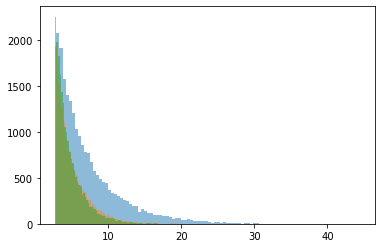

In [7]:
a = plt.hist(sixteenTrue[sixteenTrue>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")
b = plt.hist(sixteenFake[sixteenFake>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
c = plt.hist(sixteenFakeN[sixteenFakeN>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
xx = [x*y for x,y in zip(a[0], a[1])]
yy = [x*y for x,y in zip(b[0], b[1])]
zz = [x*y for x,y in zip(c[0], c[1])]

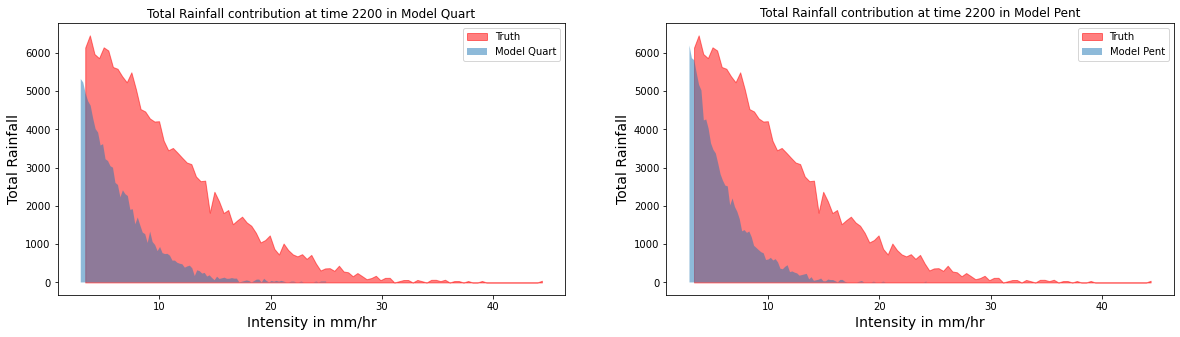

In [8]:

# li = 6000
# plt.ylim(0,li)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel("Intensity in mm/hr", size=14)
plt.ylabel("Total Rainfall", size=14)
plt.title("Total Rainfall contribution at time 2200 in Model Quart")
plt.fill_between(a[1][1:],xx, color = 'r',  alpha=0.5, label="Truth")
plt.fill_between(b[1][1:],yy, alpha=0.5, label="Model Quart")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Intensity in mm/hr", size=14)
plt.ylabel("Total Rainfall", size=14)
plt.title("Total Rainfall contribution at time 2200 in Model Pent")
plt.fill_between(a[1][1:],xx, color = 'r',alpha=0.5, label="Truth")
plt.fill_between(c[1][1:],zz,alpha=0.5, label="Model Pent")
plt.legend(loc='upper right')

plt.show()

In [2]:
predsAfO = np.load('/Users/itish/Documents/Diss/Files/predictions/predsOld_6.npy')
predsAfN = np.load('/Users/itish/Documents/Diss/Files/predictions/predsNew_6.npy')
predsInC = np.load('/Users/itish/Documents/Diss/Files/predictions/predsIndCos.npy')
predsInM = np.load('/Users/itish/Documents/Diss/Files/predictions/predsIndMou.npy')
ogAf = np.load('/Users/itish/Documents/Diss/Files/og/og.npy')
ogIC = np.load('/Users/itish/Documents/Diss/Files/og/ogIndcos.npy')
ogIM = np.load('/Users/itish/Documents/Diss/Files/og/ogIndMou.npy')


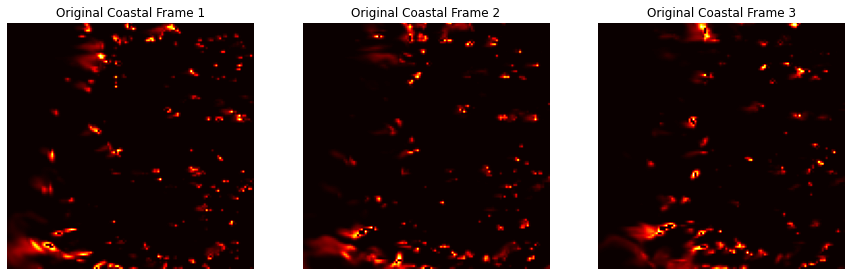

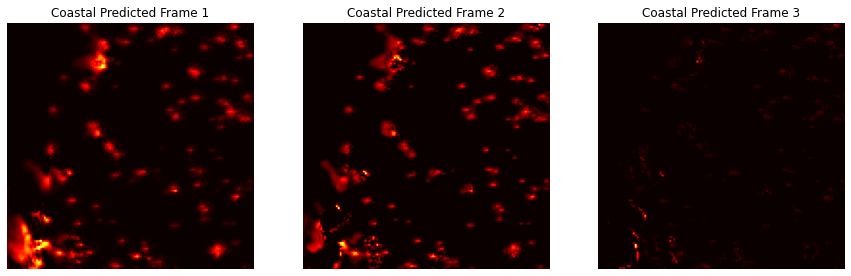

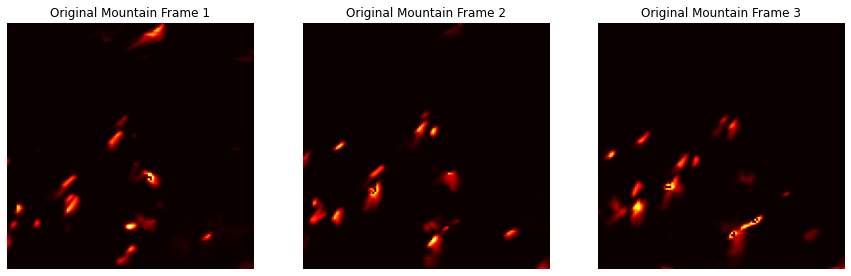

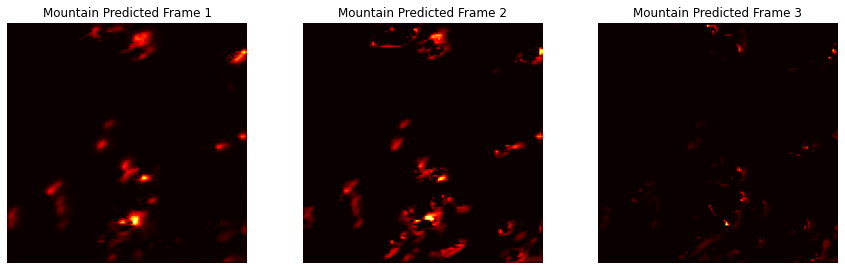

In [38]:
n = 77
map = 'hot'
plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.squeeze(ogIC[n][i]), cmap=map)
    plt.title(f"Original Coastal Frame {i+1}")
    plt.axis("off")
plt.show()

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(np.squeeze(predsInC[n][i]), cmap=map)
    plt.title(f"Coastal Predicted Frame {i+1}")
    plt.axis("off")
plt.show()

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.squeeze(ogIM[n][i]), cmap=map)
    plt.title(f"Original Mountain Frame {i+1}")
    plt.axis("off")
plt.show()


plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(predsInM[n][i]), cmap=map)
    plt.title(f"Mountain Predicted Frame {i+1}")
    plt.axis("off")
plt.show()

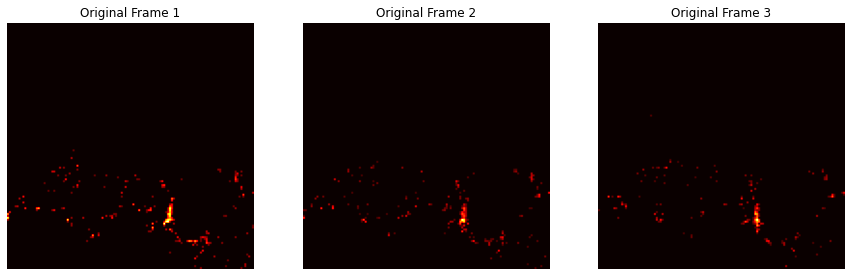

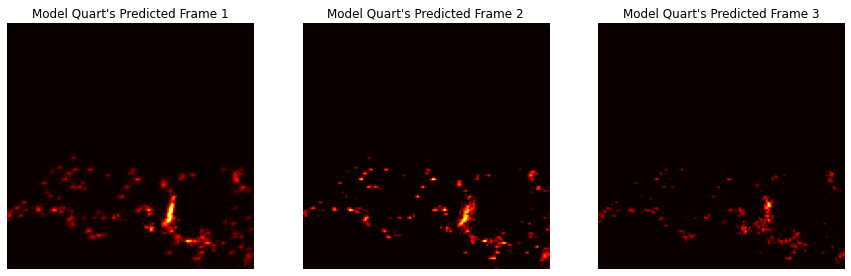

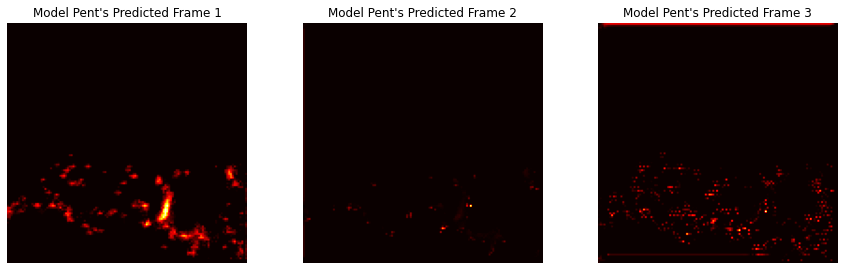

In [45]:
n = 18

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.squeeze(ogAf[n][i]), cmap="hot")
    plt.title(f"Original Frame {i+1}")
    plt.axis("off")
plt.show()

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(np.squeeze(predsAfO[n][i]), cmap="hot")
    plt.title(f"Model Quart's Predicted Frame {i+1}")
    plt.axis("off")
plt.show()

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(predsAfN[n][i]), cmap="hot")
    plt.title(f"Model Pent's Predicted Frame {i+1}")
    plt.axis("off")
plt.show()

# Bharat


In [ ]:
ind = np.load('/Users/itish/Documents/Diss/Files/testInd.npy')


<class 'netCDF4._netCDF4.Variable'>
float32 stratiform_rainfall_flux(forecast_period_0, forecast_reference_time, latitude, longitude)
    standard_name: stratiform_rainfall_flux
    units: kg m-2 s-1
    um_stash_source: m01s04i203
    cell_methods: time: mean (interval: 1 hour)
    grid_mapping: latitude_longitude
    coordinates: time_0
unlimited dimensions: 
current shape = (24, 22, 750, 1250)
filling on, default _FillValue of 9.969209968386869e+36 used

In [2]:
# with xr.open_dataset('/Users/itish/Downloads/Irr_20160710.nc', mode='r', decode_cf=True) as ds2:
                # ds2 = ds2[0,:,:,:]
                # print(ds2)
                # dsm2 = ds2.where((70 < ds2.longitude) & (80 > ds2.longitude) 
                # & (20 < ds2.latitude) 
                # & (ds2.latitude < 30), drop=True)

# lons = dsm2.variables['longitude'][:]
# lats = dsm2.variables['latitude'][:]
# dsm2.shape
lonbounds = [72,80]
latbounds = [20,30]
fh = Dataset('/Users/itish/Documents/Diss/Files/Irr_20160710.nc')  
lats = fh.variables['latitude'][:]
lons = fh.variables['longitude'][:]

# Latitude indexes (Low and Upper)
lat_li = np.argmin( np.abs( lats - latbounds[0] ) )
lat_ui = np.argmin( np.abs( lats - latbounds[1] ) ) 
# Longitude indexes (Low and Upper)
lon_li = np.argmin( np.abs( lons - lonbounds[0] ) )
lon_ui = np.argmin( np.abs( lons - lonbounds[1] ) )  
prec = fh.variables['stratiform_rainfall_flux'][1,1,lat_li:lat_ui ,lon_li:lon_ui ]
lats = lats[lat_li:lat_ui] 
lons = lats[lon_li:lon_ui]



fh.close()
lons.shape , lats.shape , prec.shape


((0,), (250,), (250, 200))

In [23]:
fh.variables['forecast_period_0']

<class 'netCDF4._netCDF4.Variable'>
float64 forecast_period_0(forecast_period_0)
    bounds: forecast_period_0_bnds
    units: hours
    standard_name: forecast_period
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used

Coast: lons[560:688], lats[340:468]

[340:468:,560:688]


Mount: (lons[860:988], lats[460:588])

[460:588:,860:988]

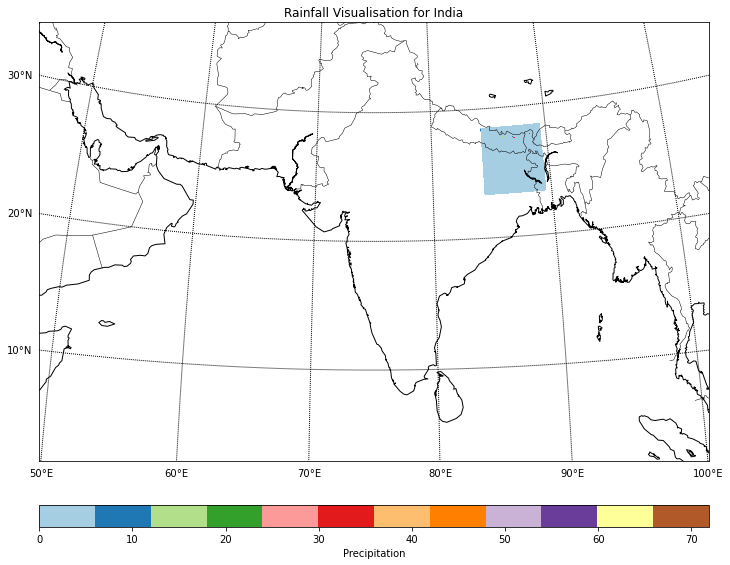

In [24]:

fh = Dataset('/Users/itish/Documents/Diss/Files/Irr_20160710.nc')  

lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]

prec = fh.variables['stratiform_rainfall_flux']
prec

lon_0 = lons.mean()
lat_0 = lats.mean()
plt.figure(figsize=(12,12))

m = Basemap(width=5800000,height=3800000,
            resolution='l',projection='stere',\
            lat_ts=50,lat_0=lat_0,lon_0=lon_0)
lon, lat = np.meshgrid(lons[860:988], lats[460:588])
xi, yi = m(lon, lat)
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# for j in range(24):
# tmax = ind[0][1]
prec = fh.variables['stratiform_rainfall_flux'][1,1,:,:]*3600
tmax = prec[460:588:,860:988]

cs = m.pcolor(xi,yi,np.squeeze(tmax),cmap = 'Paired')


# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title('Rainfall Visualisation for India')
cbar.set_label('Precipitation')

# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'






In [ ]:
with xr.open_dataset('/Users/itish/Downloads/Irr_20160710.nc', mode='r', decode_cf=True) as ds2:
    # dsm2 = ds2.where((90 < ds2.longitude) 
    # & (5 < ds2.latitude) 
    # & (ds2.latitude < 10), drop=True)
    # print(dsm2.shape)
    
    for i in range (22):
        for j in range(0,24):

            lon_0 = lons.mean()
            lat_0 = lats.mean()
            plt.figure(figsize=(12,12))

            m = Basemap(width=5800000,height=3800000,
                        resolution='l',projection='stere',\
                        lat_ts=50,lat_0=lat_0,lon_0=lon_0)
            lon, lat = np.meshgrid(lons, lats)
            xi, yi = m(lon, lat)
            # Add Grid Lines
            m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
            m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

            # Add Coastlines, States, and Country Boundaries
            m.drawcoastlines()
            m.drawstates()
            m.drawcountries()
            # for j in range(24):
            # tmax = ind[0][1]
            tmax = ds2['stratiform_rainfall_flux'][j,i,:,:]


            cs = m.pcolor(xi,yi,np.squeeze(tmax),cmap = 'Paired')


            # Add Colorbar
            cbar = m.colorbar(cs, location='bottom', pad="10%")
            plt.title('Rainfall Visualisation for India day '+str(i)+' hour '+str(j))
            plt.savefig('day '+str(i)+' hour'+str(j)+'.png')
            cbar.set_label('Precipitation')

# ccent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'






In [144]:
# precipitation vals
def getPrecValIndi(range, hour, day, file, min = 0 , latbounds = [], lonbounds = []):

    # Open FILE
    fh = Dataset(file)  
    lats = fh.variables['latitude'][:]
    lons = fh.variables['longitude'][:]
    if range == True:
        # Latitude indexes (Low and Upper)
        lat_li = np.argmin( np.abs( lats - latbounds[0] ) )
        lat_ui = np.argmin( np.abs( lats - latbounds[1] ) ) 
        # Longitude indexes (Low and Upper)
        lon_li = np.argmin( np.abs( lons - lonbounds[0] ) )
        lon_ui = np.argmin( np.abs( lons - lonbounds[1] ) )  
        prec = fh.variables['stratiform_rainfall_flux'][hour,day,lat_li:lat_ui ,lon_li:lon_ui ]
        lats = lats[lat_li:lat_ui] 
        lons = lats[lon_li:lon_ui]
    else :
        prec = fh.variables['stratiform_rainfall_flux'][hour,day,:,:]
    
    fh.close()
    prec = prec*3600
    # prec processing    

    prec[prec > min] = 0
    prec = np.flip(prec.data, axis = 0)

    return prec

In [153]:

testIndCoast = []
whole = []
intList = []
for i in range (22):
    for j in range(0,24):
        a = getPrecValIndi(False, j, i, '/Users/itish/Downloads/Irr_20160710.nc',55.5)[340:468:,560:688]

        if len(intList) < 6 :
            intList.append(a)
        else :
            x = np.stack(intList, axis=0)
            whole.append(x)
            intList = []
            intList.append(a)
        if j==23:
            x = np.stack(intList, axis=0)
            whole.append(x)
            for zdx, x in enumerate(whole):
                testIndCoast.append(whole[zdx])
            whole = []
            intList = []
testIndCoast = np.stack(testIndCoast, axis=0)
testIndCoast = np.expand_dims(testIndCoast, axis=-1)
testIndCoast.shape



(88, 6, 128, 128, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

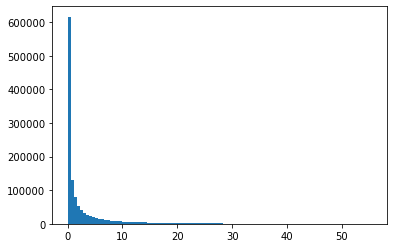

In [168]:
plt.hist(testIndCoast[testIndCoast!=0], bins = 100)
plt.show

In [163]:

testIndMount = []
whole = []
intList = []
for i in range (22):
    for j in range(0,24):
        a = getPrecValIndi(False, j, i, '/Users/itish/Downloads/Irr_20160710.nc',55.5)[460:588:,860:988]

        if len(intList) < 6 :
            intList.append(a)
        else :
            x = np.stack(intList, axis=0)
            whole.append(x)
            intList = []
            intList.append(a)
        if j==23:
            x = np.stack(intList, axis=0)
            whole.append(x)
            for zdx, x in enumerate(whole):
                testIndMount.append(whole[zdx])
            whole = []
            intList = []
testIndMount = np.stack(testIndMount, axis=0)
testIndMount = np.expand_dims(testIndMount, axis=-1)
testIndMount.shape



(88, 6, 128, 128, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

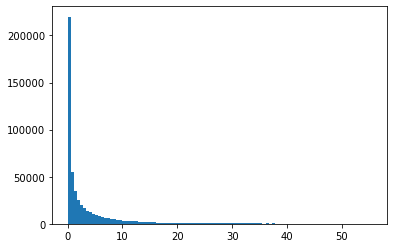

In [169]:
plt.hist(testIndMount[testIndMount!=0], bins = 100)
plt.show

In [171]:
testIndMount = np.interp(testIndMount, (0, 55.5), (0, +1))
np.save('testIndMount.npy', testIndMount)

In [ ]:
#Basemap
# for i in arr1 :
arr = [0, 2]
fh = Dataset('/Users/itish/Documents/Diss/Files/Ctl_20160523.nc', mode='r')
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
for i in arr :
    for j in hour:
        tmax = fh.variables['stratiform_rainfall_flux'][int(j),i,:,:]
        # for  idx , x in enumerate(tmax) :
        #     for jdx, a in enumerate(x):
        #         if a < 1:
        #             tmax[idx][jdx] = 0
        tmax_units = 'kg m-2 hr-1'

        # Get some parameters for the Stereographic Projection
        lon_0 = lons.mean()
        lat_0 = lats.mean()

        m = Basemap(width=6000000,height=4500000,
                    resolution='l',projection='stere',\
                    lat_ts=50,lat_0=lat_0,lon_0=lon_0)
                    
        # Because our lon and lat variables are 1D,
        # use meshgrid to create 2D arrays
        # Not necessary if coordinates are already in 2D arrays.
        lon, lat = np.meshgrid(lons, lats)
        xi, yi = m(lon, lat)
        # Plot Data

        plt.figure(figsize=(12,12))

        cs = m.pcolor(xi,yi,np.squeeze(tmax))

        # Add Grid Lines
        m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
        m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

        # Add Coastlines, States, and Country Boundaries
        m.drawcoastlines()
        m.drawstates()
        m.drawcountries()

        # Add Colorbar
        cbar = m.colorbar(cs, location='bottom', pad="10%")

        cbar.set_label(tmax_units)


        # Add Title
        plt.title('day 1 hour'+str(j))
        plt.savefig('day '+str(i)+' hour'+str(j)+'.png')





In [18]:
#gif creation
names = os.listdir('/Users/itish/Documents/Diss/Files/images/untitled folder')
names = sorted(names)
names = names[1:]

with imageio.get_writer('mygifInd.gif', mode='I') as writer:
    for filename in names:
        image = imageio.imread('/Users/itish/Documents/Diss/Files/images/untitled folder/'+filename)
        writer.append_data(image)

/var/folders/z9/3z2hn7yx20d993zq6c4s0d340000gn/T/ipykernel_3263/4061928501.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/Users/itish/Documents/Diss/Files/images/untitled folder/'+filename)


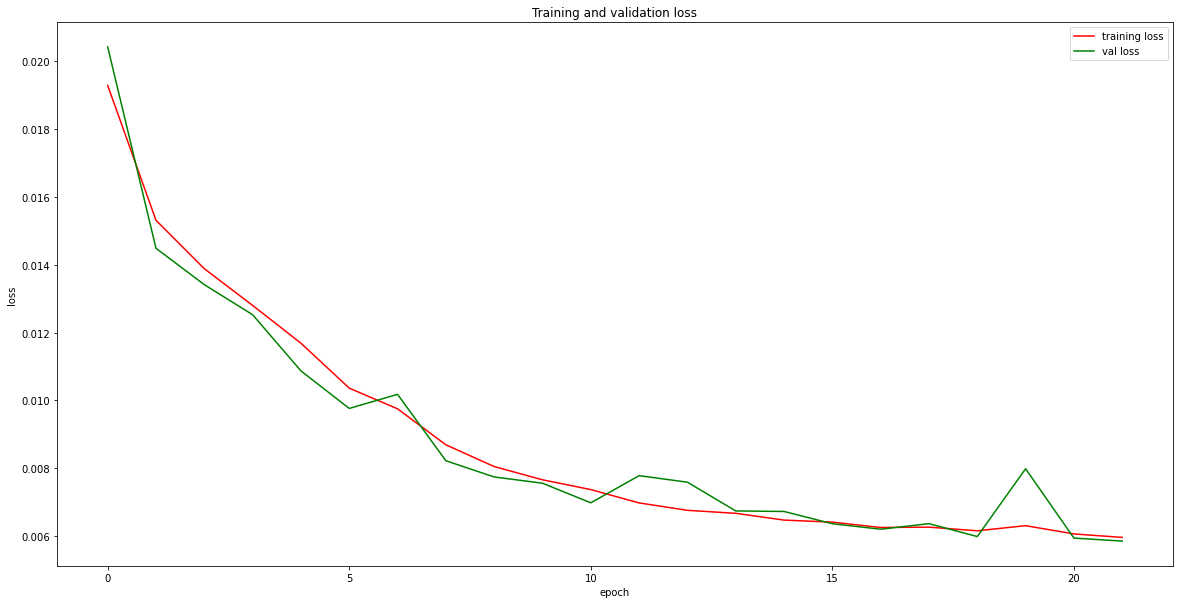

In [53]:
plotChart('/Users/itish/Documents/Diss/Files/colab/loss_log.json')

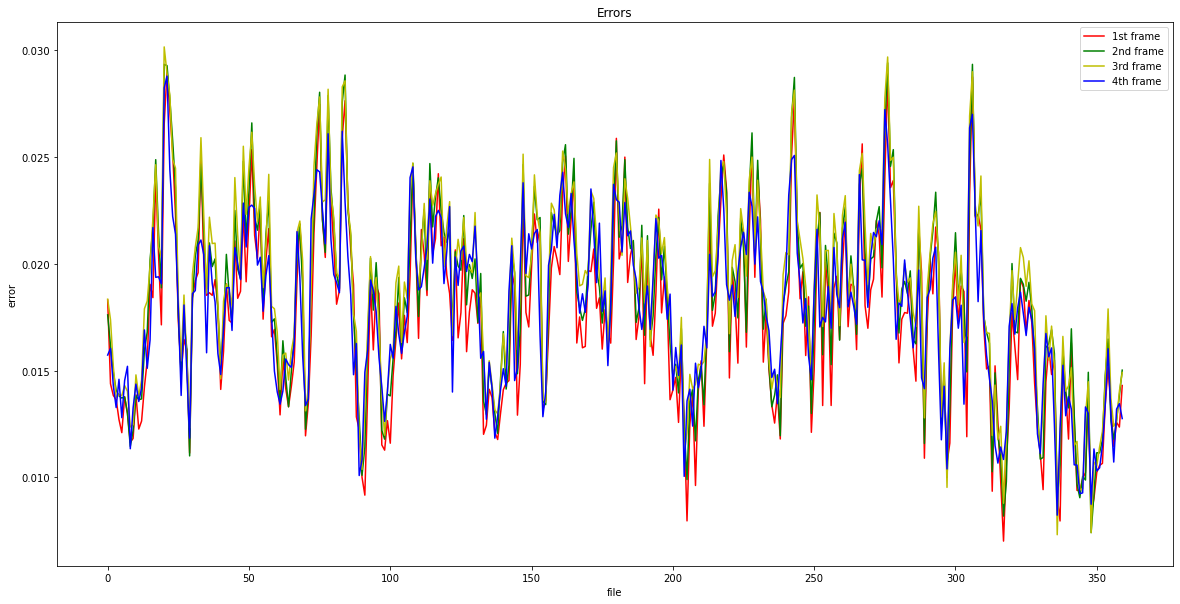

In [12]:
errors("/Users/itish/Downloads/rmse")

In [ ]:
with open("/Users/itish/Downloads/rmse", "rb") as fp:   # Unpickling
  rmse = pickle.load(fp)
rmse

In [11]:
predcos = np.load('/Users/itish/Documents/Diss/Files/predictions/predsIndCos.npy')
predmo = np.load('/Users/itish/Documents/Diss/Files/predictions/predsIndMou.npy')
co = np.load('/Users/itish/Documents/Diss/Files/og/ogIndcos.npy')
mo = np.load('/Users/itish/Documents/Diss/Files/og/ogIndMou.npy')

In [51]:
f = 0
sixteenFakeC = []
sixteenTrueC = []
sixteenTrueM = []
sixteenFakeM = []

for idx, i in enumerate(predcos):
  c = (idx+1)%4
  if c== 0:
    sixteenFakeC.append(i[f])
    sixteenTrueC.append(co[idx][f])
    sixteenTrueM.append(mo[idx][f])
    sixteenFakeM.append(predmo[idx][f])
    
sixteenFakeC = np.stack(sixteenFakeC)
sixteenTrueC = np.stack(sixteenTrueC)
sixteenTrueM = np.stack(sixteenTrueM)
sixteenFakeM = np.stack(sixteenFakeM)




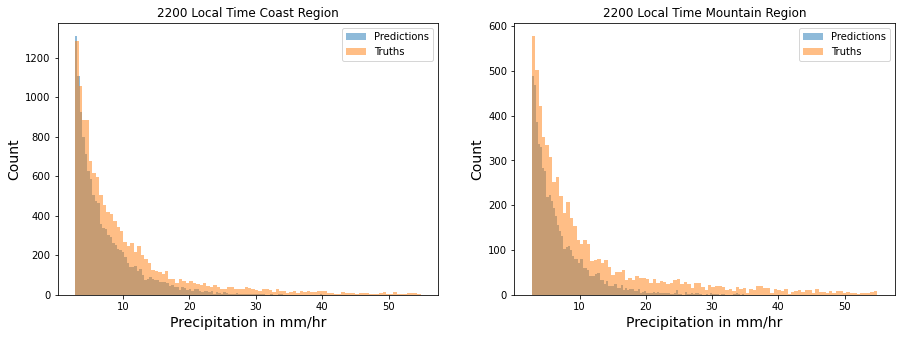

In [34]:

# li = 2000
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
# plt.ylim(0,li)

plt.hist(sixteenFakeC[sixteenFakeC>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
plt.hist(sixteenTrueC[sixteenTrueC>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")

plt.xlabel("Precipitation in mm/hr", size=14)
plt.ylabel("Count", size=14)
plt.title("2200 Local Time Coast Region")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
# plt.ylim(0,li)

plt.hist(sixteenFakeM[sixteenFakeM>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
plt.hist(sixteenTrueM[sixteenTrueM>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")

plt.xlabel("Precipitation in mm/hr", size=14)
plt.ylabel("Count", size=14)
plt.title("2200 Local Time Mountain Region")
plt.legend(loc='upper right')

plt.show()



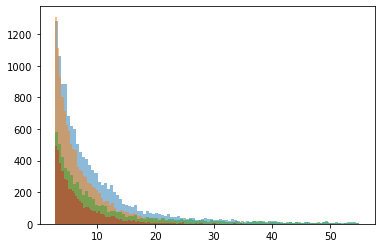

In [52]:
a = plt.hist(sixteenTrueC[sixteenTrueC>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")
b = plt.hist(sixteenFakeC[sixteenFakeC>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")
c = plt.hist(sixteenTrueM[sixteenTrueM>0.05].flatten()*55, bins=100, alpha=0.5, label="Truths")
d = plt.hist(sixteenFakeM[sixteenFakeM>0.05].flatten()*55, bins=100, alpha=0.5, label="Predictions")

xx = [x*y for x,y in zip(a[0], a[1])]
yy = [x*y for x,y in zip(b[0], b[1])]
zz = [x*y for x,y in zip(c[0], c[1])]
jj = [x*y for x,y in zip(d[0], d[1])]

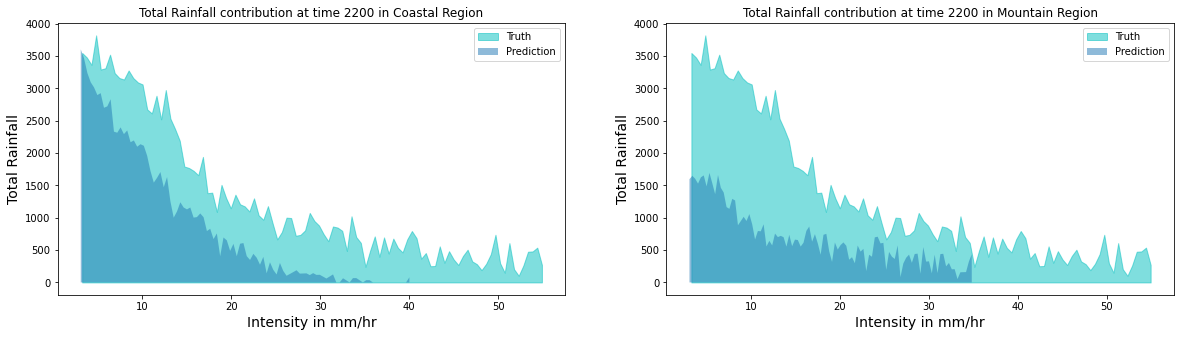

In [53]:

# li = 6000
# plt.ylim(0,li)
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.xlabel("Intensity in mm/hr", size=14)
plt.ylabel("Total Rainfall", size=14)
plt.title("Total Rainfall contribution at time 2200 in Coastal Region")
plt.fill_between(a[1][1:],xx, color = 'c',  alpha=0.5, label="Truth")
plt.fill_between(b[1][1:],yy, alpha=0.5, label="Prediction")
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Intensity in mm/hr", size=14)
plt.ylabel("Total Rainfall", size=14)
plt.title("Total Rainfall contribution at time 2200 in Mountain Region")
plt.fill_between(c[1][1:],xx, color = 'c',alpha=0.5, label="Truth")
plt.fill_between(d[1][1:],zz,alpha=0.5, label="Prediction")
plt.legend(loc='upper right')

plt.show()